In [4]:
import random
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

Random Variable Probability is a mathematical concept that assigns numerical values to outcomes of a sample space. They can describe the outcomes of objective randomness (like tossing a coin) or subjective randomness(results of a cricket game).
There are two types of Random Variables- Discrete and Continuous.

In [7]:
outcomes = [1, 2, 3, 4, 5, 6]

num_rolls = 1000
samples = [random.choice(outcomes) for _ in range(num_rolls)]
frequency = Counter(samples)
for outcome in outcomes:
    probability = frequency[outcome] / num_rolls
    print(f"Probability of rolling a {outcome}: {probability:.3f}")


Probability of rolling a 1: 0.163
Probability of rolling a 2: 0.178
Probability of rolling a 3: 0.162
Probability of rolling a 4: 0.175
Probability of rolling a 5: 0.158
Probability of rolling a 6: 0.164


In [10]:
num_samples = 1000
samples = [random.uniform(0, 1) for _ in range(num_samples)]
mean = sum(samples) / num_samples
vnormariance = sum((x - mean) ** 2 for x in samples) / num_samples
print(f"Mean of uniform samples: {mean:.3f}")
print(f"Variance of uniform samples: {variance:.3f}")


Mean of uniform samples: 0.485
Variance of uniform samples: 0.085


probability Distribution 
A probability Distribution represents the predicted outcomes of various values for a given data. Probability distributions occur in a variety of forms and sizes, each with its own set of characteristics such as mean, median, mode, skewness, standard deviation, kurtosis, etc. 

There are many different probability distributions
each with its own characteristics and applications. Some of the most commonly occurring distributions include:

Normal distribution: a bell-shaped distribution that is often used to model continuous data such as height, weight, or IQ scores.
Binomial distribution: a distribution that describes the number of successes in a fixed number of independent trials, such as the number of heads in ten coin flips.
Poisson distribution: a distribution that describes the number of rare events that occur within a fixed interval of time or space, such as the number of car accidents in a day.
Exponential distribution: a distribution that describes the time between two consecutive events in a Poisson process, such as the time between arrivals at a service center.

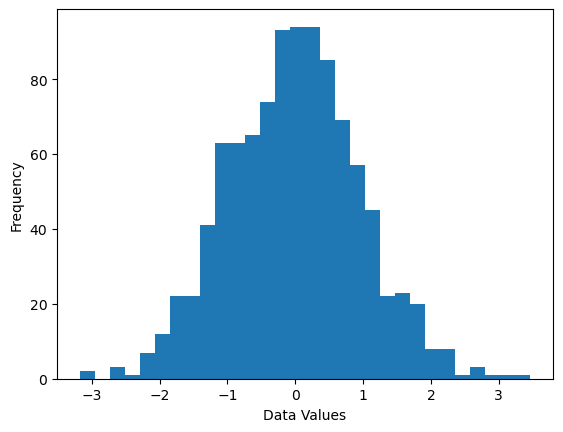

In [18]:
data = np.random.normal(size=1000)
plt.hist(data, bins=30)

plt.xlabel('Data Values')
plt.ylabel('Frequency')

plt.show()

Probability Mass Function (PMF)
Probability mass function also called as probability function or frequency function is defined as a function that gives the probability that a discrete random variable is exactly equal to some value.

P(X) where X is a random variable is known as probability mass function, where a random variable can be:

Discrete,
Continuous

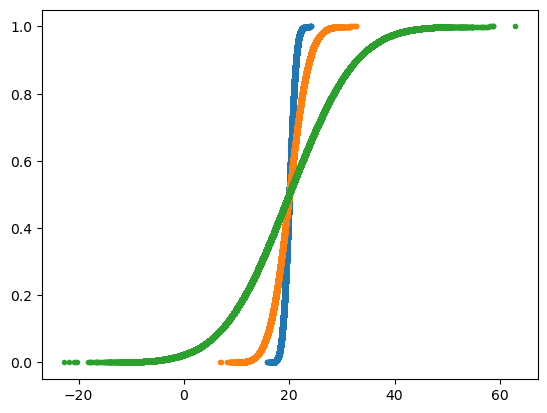

In [31]:
def ecdf(data):
    x = np.sort(data)
    n = x.size
    y = np.arange(1, n+1) / n
    return(x,y)

# Generate CDFs
x_std1, y_std1 = ecdf(samples_std1)
x_std3, y_std3 = ecdf(samples_std3)
x_std10, y_std10 = ecdf(samples_std10)

# Plot CDFs
plt.plot(x_std1, y_std1, marker='.', linestyle='none')
plt.plot(x_std3, y_std3, marker='.', linestyle='none')
plt.plot(x_std10, y_std10, marker='.', linestyle='none')
plt.show()

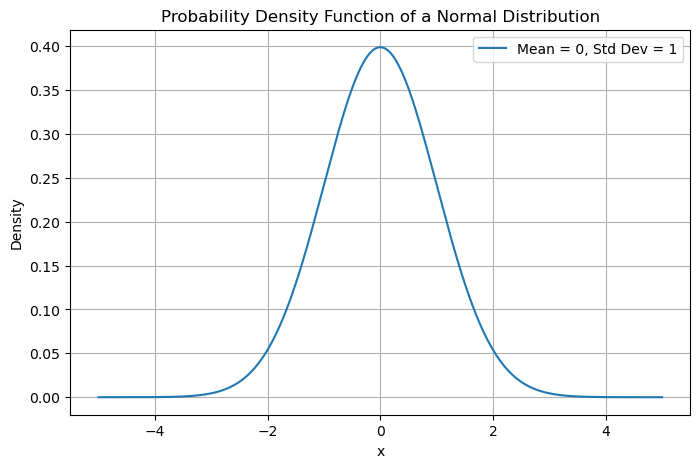

In [37]:
mean = 0 
std_dev = 1  

# Generate a range of values
x = np.linspace(-5, 5, 1000)
# Calculate the PDF for each value
pdf = norm.pdf(x, mean, std_dev)

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(x, pdf, label=f"Mean = {mean}, Std Dev = {std_dev}")
plt.title("Probability Density Function of a Normal Distribution")
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()

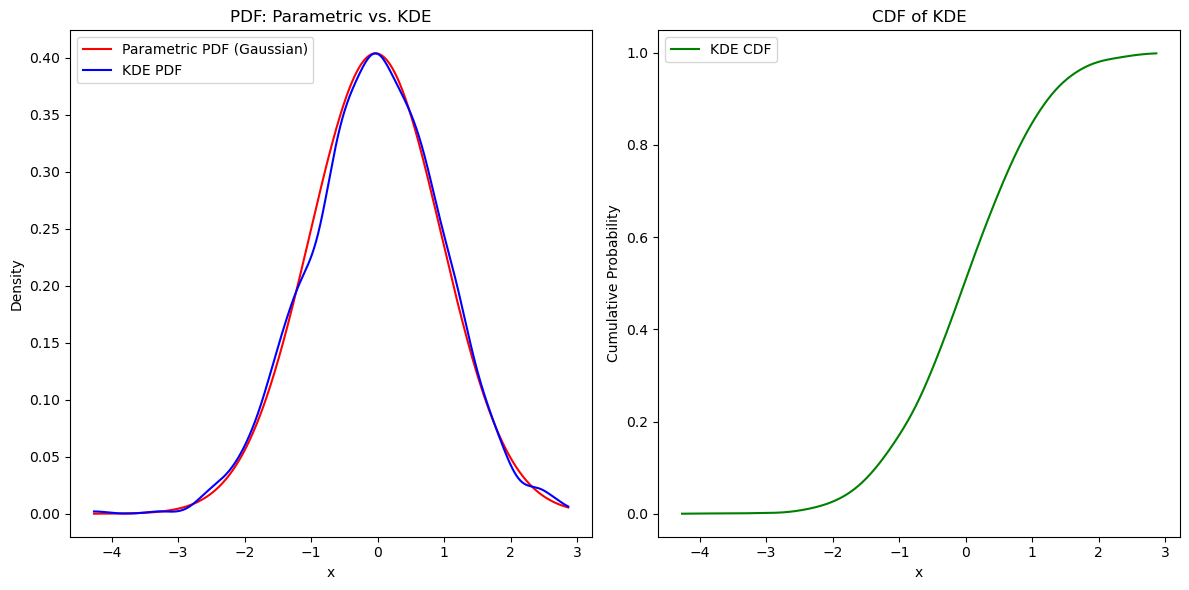

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Generate random data
data = np.random.normal(loc=0, scale=1, size=1000)

# Parametric Density Estimation - Gaussian Distribution
mean, std = np.mean(data), np.std(data)
x_vals = np.linspace(min(data), max(data), 1000)
parametric_pdf = (1 / (std * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x_vals - mean) / std) ** 2)

# Non-Parametric Density Estimation - KDE
kde = gaussian_kde(data, bw_method=0.2)
kde_pdf = kde(x_vals)

# CDF of KDE
kde_cdf = np.cumsum(kde_pdf) * (x_vals[1] - x_vals[0])  # Approximate integral with cumulative sum

# Plot the PDF and CDF
plt.figure(figsize=(12, 6))

# Plot Parametric and KDE PDFs
plt.subplot(1, 2, 1)
plt.plot(x_vals, parametric_pdf, label="Parametric PDF (Gaussian)", color="red")
plt.plot(x_vals, kde_pdf, label="KDE PDF", color="blue")
plt.title("PDF: Parametric vs. KDE")
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()

# Plot KDE CDF
plt.subplot(1, 2, 2)
plt.plot(x_vals, kde_cdf, label="KDE CDF", color="green")
plt.title("CDF of KDE")
plt.xlabel("x")
plt.ylabel("Cumulative Probability")
plt.legend()

plt.tight_layout()
plt.show()
